In [67]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("ucsd_US_print_dataset_03162023.csv")

In [60]:
df_ori = pd.read_csv("ucsd_US_print_dataset_03162023.csv").iloc[:,55:]

In [34]:
cols = df.columns[55:]
cols

Index(['lifetime_loyalty_class', 'supply_selectability_number',
       'user_sub_environment', 'ampv', 'ave_cc_mo', 'blk_cc_mo', 'color_cc_mo',
       'hp_share', 'days', 'trade_cc', 'hp_cc', 'first_report', 'last_report',
       'subscription_id', 'enrolled_on_date', 'subscription_date',
       'unsubscribe_date', 'obsolete_date', 'subscription_state',
       'current_plan'],
      dtype='object')

In [35]:
for col in cols:
    print(f"{col}:\t{sum(df[col].isna())}")

lifetime_loyalty_class:	46
supply_selectability_number:	0
user_sub_environment:	0
ampv:	0
ave_cc_mo:	0
blk_cc_mo:	0
color_cc_mo:	0
hp_share:	562565
days:	0
trade_cc:	0
hp_cc:	0
first_report:	0
last_report:	0
subscription_id:	1372521
enrolled_on_date:	1372521
subscription_date:	1581798
unsubscribe_date:	2098151
obsolete_date:	2089130
subscription_state:	1372521
current_plan:	1372521


## lifetime_loyalty_class

In [36]:
df.groupby('lifetime_loyalty_class')['MDM ID'].nunique()

lifetime_loyalty_class
DISLOYAL               270973
HOST ONLY              476443
LOYAL                 1193041
NO INK CONSUMPTION      19795
NON HP ONLY             24807
SUSPECT ONLY            34257
Name: MDM ID, dtype: int64

In [37]:
# Remove NA
df = df.dropna(subset='lifetime_loyalty_class')
len(df)

2169780

## supply_selectability_number

In [38]:
df['supply_selectability_number'].head()

0    63/123/302/803
1        67/305/805
2        64/303/804
3       910/912/915
4        64/303/804
Name: supply_selectability_number, dtype: object

In [47]:
# Return the number of ink types available
df['available_ink_number'] = df['supply_selectability_number'].str.split("/").str.len()

In [48]:
df['available_ink_number'].head()

0    4
1    3
2    3
3    3
4    3
Name: available_ink_number, dtype: int64

In [50]:
#df = df.drop(['supply_selectability_number'], axis = 1)

## user_sub_environment

In [51]:
df['user_sub_environment'].unique()

array(['Home Business', 'Home Personal', 'Unknown', 'Office Size Unknown',
       'Home Unknown', 'Office < 10', 'Office >= 10'], dtype=object)

In [52]:
# Combine "Home" "Office" "Unknown" -> extract the first word

In [62]:
df['user_sub_environment'] = df['user_sub_environment'].str.split().str[0]
df['user_sub_environment'].head()

0    Home
1    Home
2    Home
3    Home
4    Home
Name: user_sub_environment, dtype: object

In [63]:
df['user_sub_environment'].unique()

array(['Home', 'Unknown', 'Office'], dtype=object)

## ampv: log + 1

In [108]:
# log + 1
df['ampv_log'] = np.log(df['ampv']+1)

<AxesSubplot:>

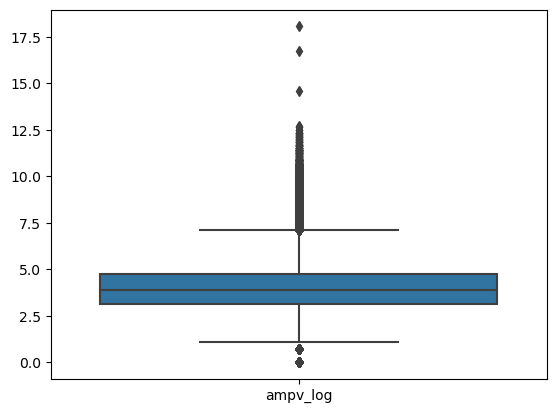

In [109]:
sns.boxplot(data=df[['ampv_log']])

## ave_cc_mo: Remove
## blk_cc_mo, color_cc_mo: log + 1

In [119]:
# Remove ave_cc_mo
df = df.drop(['ave_cc_mo'], axis=1)

KeyError: "['ave_cc_mo'] not found in axis"

In [114]:
# log + 1
df['blk_log'] = np.log(df['blk_cc_mo']+1)
df['color_log'] = np.log(df['color_cc_mo']+1)

<AxesSubplot:>

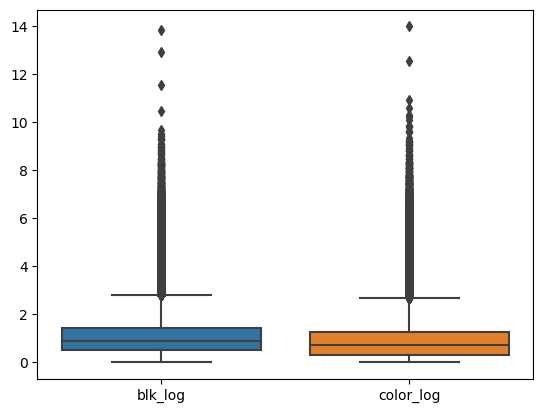

In [116]:
sns.boxplot(data=df[['blk_log','color_log']])

In [120]:
df = df.drop(['blk_cc_mo', 'color_cc_mo'], axis=1)

## hp_share fill na with 1

In [132]:
df['hp_share'].describe()

count    1.607236e+06
mean     9.390837e-01
std      1.848439e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: hp_share, dtype: float64

In [124]:
sum(df['hp_share'].isna())

562544

In [130]:
len(df[df['hp_share'] == 1])/len(df['hp_share'])

0.5998391541999649

In [131]:
sum(df['hp_share'].isna())/len(df['hp_share'])

0.2592631511028768

In [127]:
len(df[df['hp_share'] == 1])/(len(df['hp_share']) - sum(df['hp_share'].isna()))

0.8097871127824414

<AxesSubplot:ylabel='Count'>

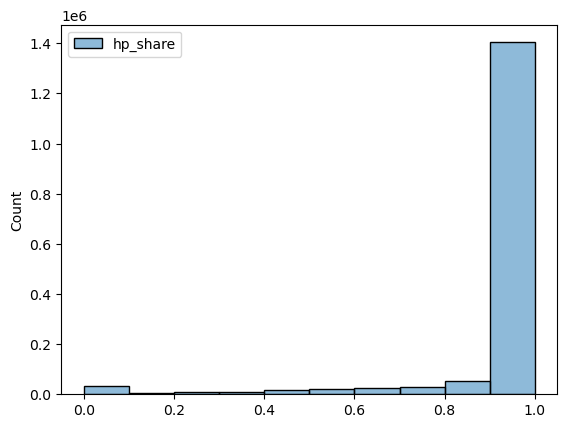

In [123]:
sns.histplot(df[['hp_share']], binwidth=0.1)

In [144]:
df['hp_share'] = df['hp_share'].fillna(1)

## days, trade_cc: leave it 
## hp_cc: remove

In [145]:
df = df.drop(['hp_cc'], axis=1)

## Remove first report, last report

In [157]:
df['diff_days'] = (pd.to_datetime(df['last_report']) - pd.to_datetime(df['first_report'])) / np.timedelta64(1, 'D')

In [158]:
df[['Registration_Dt','first_report','last_report','days', 'diff_days']]

,Registration_Dt,first_report,last_report,days,diff_days
0,2021-02-03,2018-05-31,2020-07-31,833.4,792.0
1,2020-11-13,2020-11-30,2021-06-30,209.2,212.0
2,2021-01-11,2021-01-31,2021-01-31,0.0,0.0
3,2021-05-08,2021-05-31,2021-06-30,32.6,30.0
4,2020-08-05,2020-08-31,2021-06-30,309.0,303.0
...,...,...,...,...,...
2169821,2021-07-17,2016-08-31,2021-06-30,1746.0,1764.0
2169822,2020-07-15,2017-05-31,2021-06-30,1495.2,1491.0
2169823,2021-05-10,2021-05-31,2021-06-30,31.3,30.0
2169824,2021-02-02,2018-12-31,2019-02-28,78.8,59.0


In [148]:
sum(df['Registration_Dt'] > df['first_report'])

831587

In [150]:
sum(df['Registration_Dt'] > df['last_report'])

302438

## subscription_id -> subscribed: replace na with 0, non-na with 1

In [159]:
df['subscribed'] = np.where(df['subscription_id'].isna(), 0, 1)

In [163]:
sum(df['subscribed'])

797287

In [165]:
sum(df['subscription_id'].notna())

797287

## subscription_state == "subscribed" -> df['subscription_paid']

In [166]:
df['subscription_state'].unique()

array([nan, 'subscribed', 'subscribed_no_pens', 'obsolete',
       'unsubscribed', 'initiated_unsubscribe', 'obsolete_replacement',
       'unknown'], dtype=object)

In [167]:
df['subscription_paid'] = np.where(df['subscription_state'] == 'subscribed', 1, 0)
df['obsolete'] = np.where((df['subscription_state'] == 'obsolete') | (df['subscription_state'] == 'obsolete_replacement'), 1, 0)
df['unsubscribed'] = np.where((df['subscription_state'] == 'unsubscribed') | (df['subscription_state'] == 'initiated_unsubscribe'), 1, 0)

In [169]:
df = df.drop(['subscription_id', 'enrolled_on_date', 'subscription_date','unsubscribe_date', 'obsolete_date', 'subscription_state'], axis=1)

## current_plan: extract the number part; fillna(0)

In [181]:
df['current_plan'] = df['current_plan'].str.split().str[0].fillna(0)